# Ada Hack - Corp Solutions

### Objetivo:
Identificar padrões de diversidade e desequilíbrios nos dados e propor soluções para promover a inclusão e equidade na empresa.

## Importando bibliotecas

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Substituindo caracteres inválidos no dataset por caracteres válidos

def replace_characters_in_csv(input_file, output_file, replacements):
    with open(input_file, 'r', encoding='utf-8') as infile:
        content = infile.read()

    for old_char, new_char in replacements.items():
        content = content.replace(old_char, new_char)

    with open(output_file, 'w', encoding='utf-8') as outfile:
        outfile.write(content)

  # Example dictionary for replacements
replacements = {
       'Ã¡': 'á', 'Ã¢': 'â', 'Ã£': 'ã', 'Ã©': 'é', 'Ãª': 'ê',
        'Ã­': 'í', 'Ã³': 'ó', 'Ãµ': 'õ', 'Ã´': 'ô',
        'Ãº': 'ú', 'Ã§': 'ç'
    # Add more mappings as needed
}

input_file = '../../base_dados/base_de_dados.csv'
output_file = '../../base_dados/base_corrigida.csv'

replace_characters_in_csv(input_file, output_file, replacements)

## Importando arquivo corrigido com os dados

In [2]:
df = pd.read_csv('../../base_dados/base_corrigida.csv')

## Sobre o dataset

In [3]:
df.head()

,id,id.1,Nome,Genero,Idade,Raça,Endereço,Formação,Estado,Tempo de casa,Departamento,Senioridade
0,1,1,Eleonora Arilda Penedo Gomes de Padilha,Fem,34.0,pardo,"9155 Harold Oval\r\nSellersside, FL 21337",Ensino Médio,Santa Catarina,12.0,Compras,Analista Pleno
1,2,2,Elisângela Gabrielle de Osório,Fem,26.0,pardo,"941 Martin Manor\r\nLake Isaiahtown, FM 43797",Ensino Médio,Pará,6.0,Contabilidade,Analista Júnior
2,3,3,José Túlio de Cabral,Masc,35.0,pardo,"110 Davis Ridges\r\nMejiaville, LA 17095",Ensino Médio,Santa Catarina,5.0,Vendas,Analista Pleno
3,4,4,Ezequiel Edivaldo de Medeiros Sonao,Masc,24.0,pardo,"48010 Wilson Glen Apt. 749\r\nSmithborough, NV...",Ensino Superior,Tocantins,4.0,Administrativo,Gerente
4,5,5,Fagner Josiel dos Santos,Masc,21.0,pardo,"8666 Ramos Ports Apt. 070\r\nSandraport, MN 33570",Ensino Superior,Ceará,5.0,Recursos Humanos,Analista Júnior


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   id.1           10000 non-null  int64  
 2   Nome           10000 non-null  object 
 3   Genero         10000 non-null  object 
 4   Idade          9944 non-null   float64
 5   Raça           10000 non-null  object 
 6   Endereço       10000 non-null  object 
 7   Formação       9956 non-null   object 
 8   Estado         10000 non-null  object 
 9   Tempo de casa  9800 non-null   float64
 10  Departamento   10000 non-null  object 
 11  Senioridade    10000 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 937.6+ KB


## Limpeza e Tratamento

Dados inconsistentes na coluna 'Senioridade'

In [5]:
df.Senioridade.unique()

array(['Analista Pleno', 'Analista Júnior', 'Gerente', 'Analista Sênior',
       'Estagiário', 'Diretor', 'gerente'], dtype=object)

In [6]:
#Transforma a primeria letra em maiúscula e atualiza a coluna com esses valores
df['Senioridade'] = df['Senioridade'].str.capitalize()

Dados inconsistentes na coluna 'Idade'

In [7]:
df.Idade.isnull().sum()

56

In [8]:
#Substitui o Dataframe, agora sem linhas onde o valor de Idade é Nan
df = df[df.Idade.notnull()]

In [9]:
df[df.Idade < 18].shape

(56, 12)

In [10]:
# Substitui o Dataframe, agora sem valores de idade menores que 18
df = df[df.Idade >= 18]

Dados inconsistentes na coluna 'Tempo de casa'

In [11]:
df['Tempo de casa'].isnull().sum()

199

In [12]:
df[df['Tempo de casa'] < 0].shape

(96, 12)

In [13]:
# Substitui o Dataframe, agora sem valores de Tempo de casa negativos
df = df[df['Tempo de casa'] >= 0]

Relacionando Tempo de casa e Idade

In [14]:
df['idade_inicio'] = df['Idade'] - df['Tempo de casa']

In [15]:
#Verificando se a idade de inicio na empresa é menor que 14
df[df['idade_inicio'] < 14].shape

(772, 13)

Visto que a lei brasileira não permite admissão de menos de 14 anos, tais dados serão removidos.

In [16]:
df = df[df['idade_inicio'] >=14]

In [17]:
df.drop(columns='idade_inicio', inplace=True)

Verificando integridade

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8821 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             8821 non-null   int64  
 1   id.1           8821 non-null   int64  
 2   Nome           8821 non-null   object 
 3   Genero         8821 non-null   object 
 4   Idade          8821 non-null   float64
 5   Raça           8821 non-null   object 
 6   Endereço       8821 non-null   object 
 7   Formação       8821 non-null   object 
 8   Estado         8821 non-null   object 
 9   Tempo de casa  8821 non-null   float64
 10  Departamento   8821 non-null   object 
 11  Senioridade    8821 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 895.9+ KB


##### Comentário
Nota-se uma quantidade considerável de linhas excluídas, porém é observado que a tendência não é alterada devido as características do dataset.

## Análise exploratória

### Quantidade homens x mulheres

In [19]:
df.groupby('Genero').size().reset_index()

,Genero,0
0,Fem,2220
1,Masc,6601


In [20]:
total_genero = df.groupby('Genero').size().reset_index(name='Total')

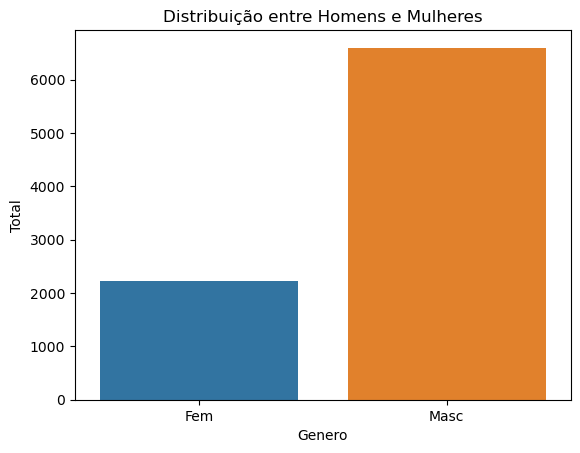

In [21]:
sns.barplot(total_genero, x='Genero', y='Total')
plt.title("Distribuição entre Homens e Mulheres");

### Distribuição por idade

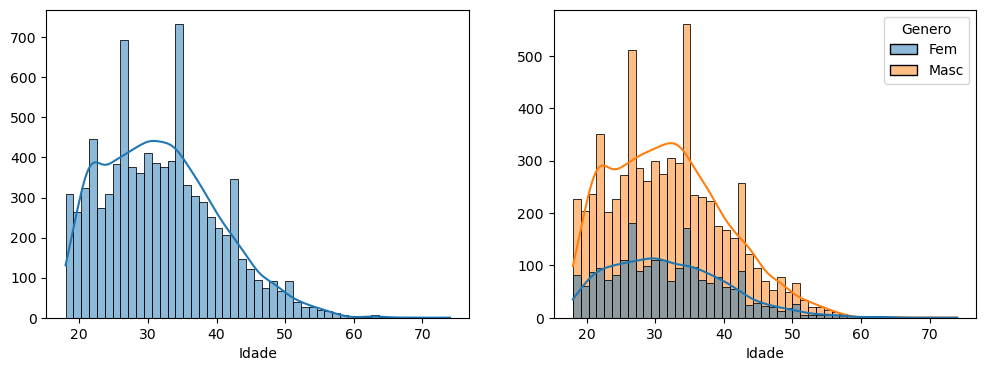

In [22]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
sns.histplot(df['Idade'], kde=True, ax=ax[0]).set_ylabel('');
sns.histplot(df, x='Idade', hue='Genero', kde=True, ax=ax[1]).set_ylabel('');
plt.show()

### Distribuição por Estado

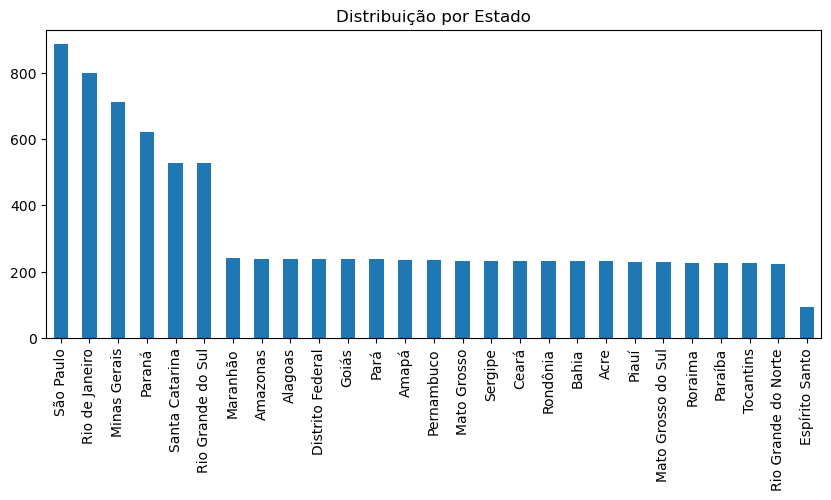

In [23]:
df.Estado.value_counts()\
    .plot(kind='bar',\
          figsize=(10,4),\
          title='Distribuição por Estado')\
    .set_xlabel('');

### Distribuição por Tempo de Casa

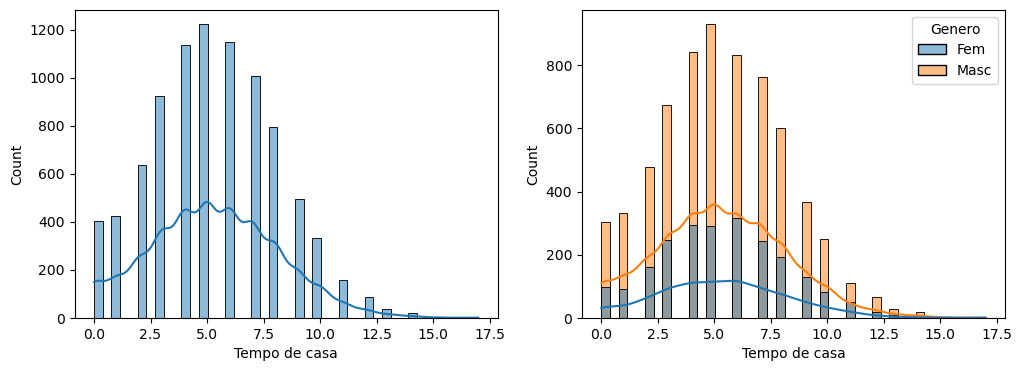

In [24]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
sns.histplot(df['Tempo de casa'], kde=True, ax=ax[0]);
sns.histplot(df, x='Tempo de casa', hue='Genero', kde=True, ax=ax[1]);
plt.show()

### Influência da raça e da formação no cargo

In [25]:
sns.set_palette("ch:s=.25,rot=-.25")

In [26]:
values = df['Formação'].value_counts().reset_index()

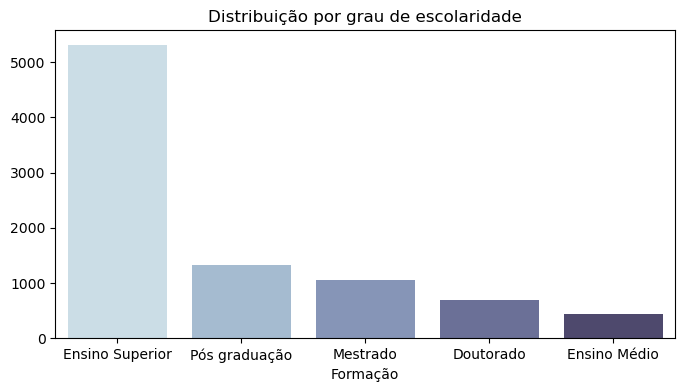

In [27]:
plt.figure(figsize=(8, 4))
sns.barplot(values, x='Formação', y='count').set_ylabel('');
plt.title("Distribuição por grau de escolaridade");

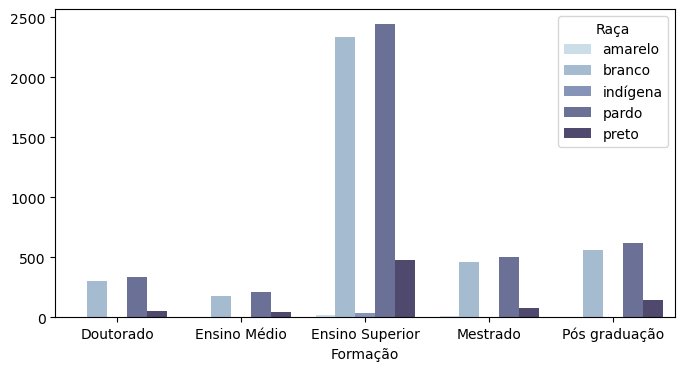

In [28]:
formacao_e_raca = df.groupby(['Formação','Raça']).size().reset_index(name='Count')

plt.figure(figsize=(8, 4))
sns.barplot(\
            x='Formação',\
            y='Count',\
            hue='Raça',\
            data=formacao_e_raca)\
    .set_ylabel('')

plt.show()

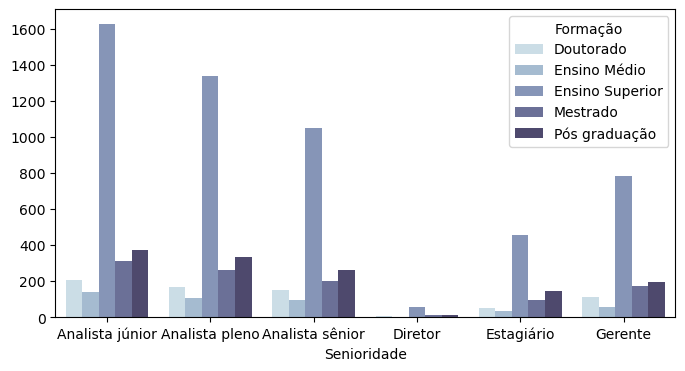

In [29]:
senioridade_formacao = df.groupby(['Senioridade','Formação']).size().reset_index(name='Count')
plt.figure(figsize=(8, 4))
sns.barplot(x='Senioridade',\
            y='Count',\
            hue='Formação',\
            data=senioridade_formacao)\
    .set_ylabel('')

plt.show()

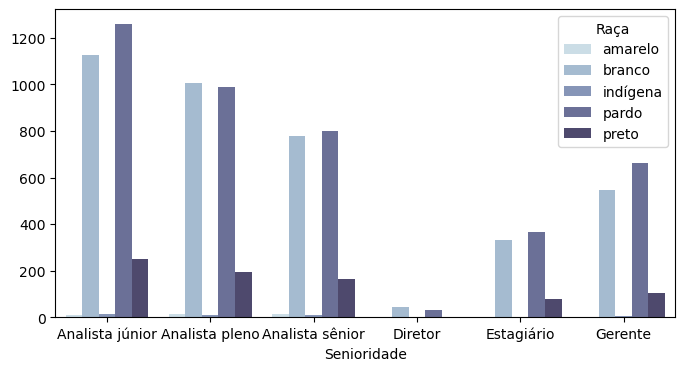

In [30]:
senioridade_raca = df.groupby(['Senioridade','Raça']).size().reset_index(name='Count')
plt.figure(figsize=(8, 4))
sns.barplot(\
            x='Senioridade',\
            y='Count',\
            hue='Raça',\
            data=senioridade_raca)\
    .set_ylabel('')

plt.show()

### Classificando diversidade

In [31]:
def criar_coluna_diversidade(row):
    if row['Raça'] == 'branco' and row['Idade'] <=35 and row['Genero'] == 'Masc':
        return 'Não diverso'
    elif row['Raça'] == 'preto' and row['Idade'] >=35 and row['Genero'] == 'Fem':
        return 'Diverso'
    elif row['Raça'] == 'indígena' and row['Idade'] >30 and row['Genero'] =='Fem':
        return 'Muito diverso'
    elif row['Raça'] == 'indígena':
        return 'Diverso'
    elif row['Raça'] == 'amarelo' and row['Idade'] >35 and row['Genero'] == 'Fem':
        return 'Diverso'
    elif row['Raça'] == 'preto' and row['Genero'] == 'Fem':
        return 'Diverso'

    elif row['Estado'] not in ['São Paulo','Rio de Janeiro', 'Minas Gerais', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul'] and  row['Genero'] == 'Fem':
        return 'Diverso'

    else:
        return 'Pouco diverso'

In [32]:
df['Diversidade'] = df.apply(criar_coluna_diversidade, axis=1)

In [33]:
df.head()

,id,id.1,Nome,Genero,Idade,Raça,Endereço,Formação,Estado,Tempo de casa,Departamento,Senioridade,Diversidade
0,1,1,Eleonora Arilda Penedo Gomes de Padilha,Fem,34.0,pardo,"9155 Harold Oval\r\nSellersside, FL 21337",Ensino Médio,Santa Catarina,12.0,Compras,Analista pleno,Pouco diverso
1,2,2,Elisângela Gabrielle de Osório,Fem,26.0,pardo,"941 Martin Manor\r\nLake Isaiahtown, FM 43797",Ensino Médio,Pará,6.0,Contabilidade,Analista júnior,Diverso
2,3,3,José Túlio de Cabral,Masc,35.0,pardo,"110 Davis Ridges\r\nMejiaville, LA 17095",Ensino Médio,Santa Catarina,5.0,Vendas,Analista pleno,Pouco diverso
3,4,4,Ezequiel Edivaldo de Medeiros Sonao,Masc,24.0,pardo,"48010 Wilson Glen Apt. 749\r\nSmithborough, NV...",Ensino Superior,Tocantins,4.0,Administrativo,Gerente,Pouco diverso
4,5,5,Fagner Josiel dos Santos,Masc,21.0,pardo,"8666 Ramos Ports Apt. 070\r\nSandraport, MN 33570",Ensino Superior,Ceará,5.0,Recursos Humanos,Analista júnior,Pouco diverso


### Criando Modelo de Machine Learning

In [34]:
# Divide os dados em Feature X e target y:

X = df[['Genero', 'Idade', 'Raça', 'Estado']]
y = df[['Diversidade']]

In [35]:
# Codificando variáveis categóricas:

X_cod = pd.get_dummies(X)

In [36]:
# Divide os dados em conjuntos de treino e test:

X_train, X_test, y_train, y_test = train_test_split(X_cod, y, test_size=0.2, random_state=42)

In [41]:
# Cria e treina modelo de Random Forest:

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

C:\Users\Ruan\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [38]:
# Faz previsões:

y_pred = model.predict(X_test)

In [39]:
# Avalia o modelo:

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

               precision    recall  f1-score   support

      Diverso       1.00      1.00      1.00       248
Muito diverso       0.00      0.00      0.00         1
  Não diverso       1.00      1.00      1.00       367
Pouco diverso       1.00      1.00      1.00      1149

     accuracy                           1.00      1765
    macro avg       0.75      0.75      0.75      1765
 weighted avg       1.00      1.00      1.00      1765

[[ 248    0    0    0]
 [   1    0    0    0]
 [   0    0  367    0]
 [   0    0    0 1149]]


C:\Users\Ruan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
